# Monte Carlo Simulations for Estimating Volume

Monte Carlo simulations involve simulating large quantities of data using repeated random samples. Depending on the scope of the analsyis, probability distributions can be factored into random occurences. This makes Monte Carlo simulations an effective tool for risk analysis.

To analyze the accuracy of Monte Carlo simulations in predicting areas and volumes of calculable figures, it was useful to create a Monte Carlo class. This enables efficient access to the various methods needed to run computations and display the results. 

In [3]:
import math, random, scipy.stats, pylab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.stats.api as sms
import statsmodels.api as sm
import import_ipynb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
class Monte_Carlo():
    
    def __init__(self):
        self.hits=0
        self.pairs=[]
        self.multi_dim_coords=[]
        self.two_dim_data=[]
        self.multi_dim_data=[]
          
  
    def monte_carlo_pi(self, points):
        # Reset values for each trial
        self.hits=0
        self.pairs=[]
        
        # Establish random points
        for i in range(points):
            x=random.uniform(-1,1)
            y=random.uniform(-1,1)
            self.pairs.append([x,y])
            
        # Count ratio of points in circle of radius one
        for coords in self.pairs:
            if coords[0]**2 + coords[1]**2 <=1:
                self.hits+=1 
                
        # Calculate error 
        return math.pi - ((self.hits/points)*4)

   
    def two_dim_display(self, points):
        # Display the indicated number of random points and a circle of radius one
        self.monte_carlo_pi(points)
        plt.rcParams["figure.figsize"] = [8,8]
        plt.scatter(*zip(*self.pairs))
        draw_circle = plt.Circle((0, 0), 1,fill=False)
        plt.gcf().gca().add_artist(draw_circle)
        plt.title('View of One Trial in Two Dimensions')
        plt.show()
        
    
    def n_dimensional_ball(self, points, dimensions):
        # Known volume equations
        volume={'3':(4/3)*math.pi, '4':(math.pi**2)/2, '5':(8*math.pi**2)/15, '6':(math.pi**3)/6, '7':(16*math.pi**3)/105}
        
        # Reset counter
        self.hits=0
          
        # Establish points in indicated dimensions
        pt_set=[]
        for pt in range(points):
            pt_coord=[]
            for dim in range(dimensions):
                axis=random.uniform(-1,1)
                pt_coord.append(axis) 
            pt_set.append(pt_coord)
        
        # Calculate distance from the origin of each point
        distance_lst=[]
        for pt in pt_set:
            distance=[]
            for i in range(len(pt)):
                sq=pt[(len(pt)-1)-i]**2
                distance.append(sq)
            distance_lst.append(distance)
        
        # Count points inside figure
        for dist in distance_lst:
            if sum(dist) <= 1:
                self.hits+=1      
        return volume[str(dimensions)] - ((self.hits/points)*(2**int(dimensions)))
    
    
    def monte_carlo_trials(self, points, dimensions, trials): 
        # Run the indicated number of trials in desired dimension
        if dimensions==2:
            for i in range(trials):
                self.two_dim_data.append(self.monte_carlo_pi(points))
            return self.two_dim_data
        else:        
            for i in range(trials):
                self.multi_dim_data.append(self.n_dimensional_ball(points, dimensions)) 
            return self.multi_dim_data
        
    
    def confidence_interval(self, points, dimensions, trials=2000):
        # Find the 95 percent confidence levels
        if dimensions==2:
            self.monte_carlo_trials(points, dimensions, trials)
            a = 1.0 * np.array(self.two_dim_data)
            return sms.DescrStatsW(a).tconfint_mean()
        else:
            self.monte_carlo_trials(points, dimensions, trials)
            b = 1.0 * np.array(self.multi_dim_data)
            return sms.DescrStatsW(b).tconfint_mean()
    
   
    def three_dim_display(self, points):
        # Establish data for indicated number of points
        ax = plt.axes(projection='3d')
        x_coords=[]
        y_coords=[]
        z_coords=[]
        for i in range(points):
            x_coords.append(random.uniform(-1,1))
            y_coords.append(random.uniform(-1,1))
            z_coords.append(random.uniform(-1,1))
            
        # Plot circle and scatter points    
        plt.rcParams["figure.figsize"] = [8,8]
        ax.scatter3D(np.array(x_coords),np.array(y_coords),np.array(z_coords))
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color='r')
        plt.title('View of One Trial in Three Dimensions')
        plt.show()
        
        
    def n_dim_histogram(self, points, dimensions, trials=2000):
        # Plot error distribution for indicated number of dimensions
        if dimensions==2:
            self.monte_carlo_trials(points, dimensions, trials)
            two_dim_data=np.array(self.two_dim_data)
            plt.rcParams["figure.figsize"] = [8,8]
            plt.hist(two_dim_data, bins= 'auto')
            plt.title('Error Distribution for Predicted Area of a Circle with Radius One')
            plt.xlabel('Error')
            plt.ylabel('Trials')
            plt.show()
        else:
            self.monte_carlo_trials(points, dimensions, trials)
            multi_dim_data=np.array(self.multi_dim_data)
            plt.rcParams["figure.figsize"] = [8,8]
            plt.hist(multi_dim_data, bins= 'auto')
            plt.title('Error Distribution for Predicted Volumes of a {} Dimensional Sphere with Radius One'.format(dimensions))
            plt.xlabel('Error')
            plt.ylabel('Trials')
            plt.show()
    
    def normality(self, data):
        # Probability plot
        measurements=np.array(data)
        plt.rcParams["figure.figsize"] = [8,8]
        scipy.stats.probplot(measurements, dist="norm", plot=pylab)
        pylab.show() 
        
    def pi_error_plot(self):
        # Gather data using 95 percent confidence level from 2000 trials
        x=np.array([1000,5000,10000,25000,50000])
        y=np.array([mcs.confidence_interval(1000, 2)[1],mcs.confidence_interval(5000, 2)[1],mcs.confidence_interval(10000, 2)[1],mcs.confidence_interval(25000, 2)[1],mcs.confidence_interval(50000, 2)[1]])
        plt.rcParams["figure.figsize"] = [8,8]
        plt.plot(x,y)
        plt.title("Error in Pi Estimation Versus Number of Points")
        plt.xlabel("Number of Points")
        plt.ylabel("Error")
        plt.show()
        
    def plot_error_vs_dim(self):
        # Gather data using 95 percent confidence level from 2000 trials
        x=np.array([2,3,4,5,6,7])
        y=np.array([mcs.confidence_interval(7000,2)[1],mcs.confidence_interval(7000,3)[1],mcs.confidence_interval(7000,4)[1],mcs.confidence_interval(7000,5)[1],mcs.confidence_interval(7000,6)[1],mcs.confidence_interval(7000,7)[1]])
        plt.rcParams["figure.figsize"] = [8,8]
        plt.plot(x,y)
        plt.title("Error in Volume Estimation Versus Number of Dimensions")
        plt.xlabel("Number of Dimensions")
        plt.ylabel("Error")
        plt.show()
        
# Instantiate a simulation
mcs=Monte_Carlo()

# Results
### Two Dimensions

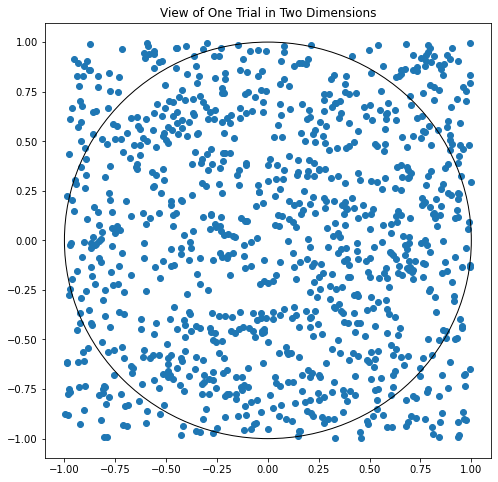

In [5]:
mcs.two_dim_display(1000)

#### Simulating 2000 repetitions of the above trial, the histogram below shows that the error has a relatively normal distribution, with a mean close to 0. 

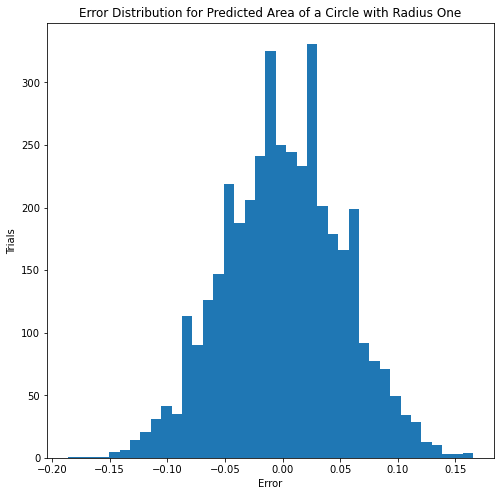

In [5]:
mcs.n_dim_histogram(1000,2)

### Three Dimensions

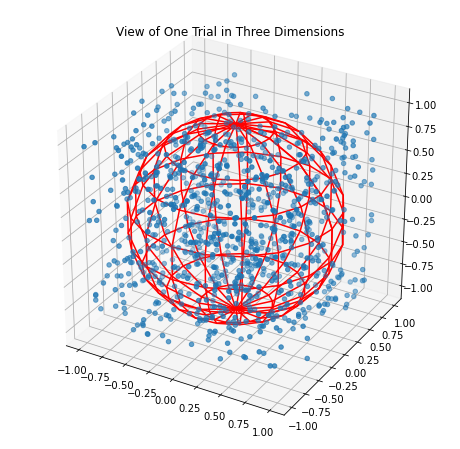

In [35]:
mcs.three_dim_display(1000)

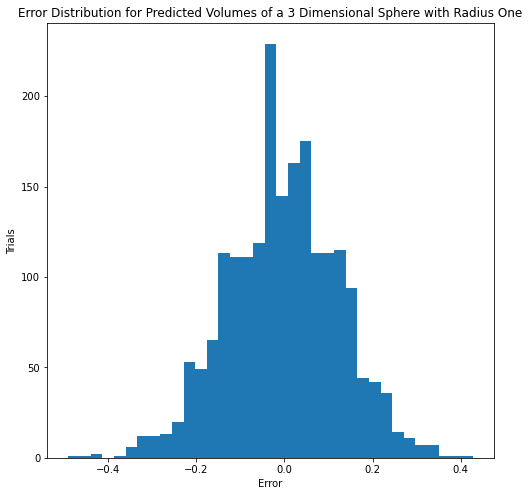

In [47]:
mcs.n_dim_histogram(1000,3)

### Higher Dimensional 

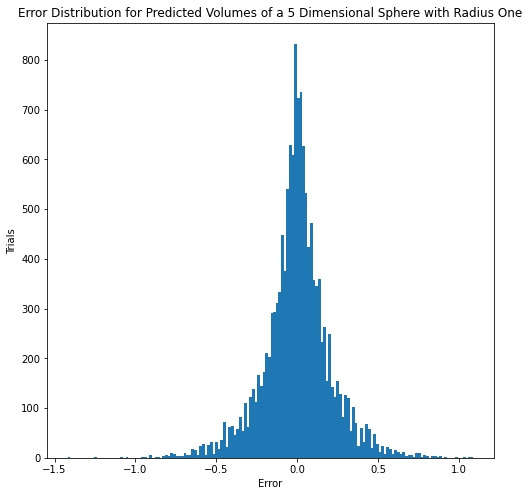

In [38]:
mcs.n_dim_histogram(5000,5)

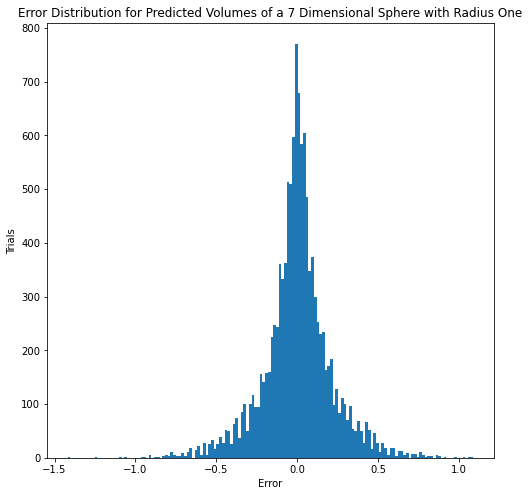

In [37]:
mcs.n_dim_histogram(5000,7)

### Insights

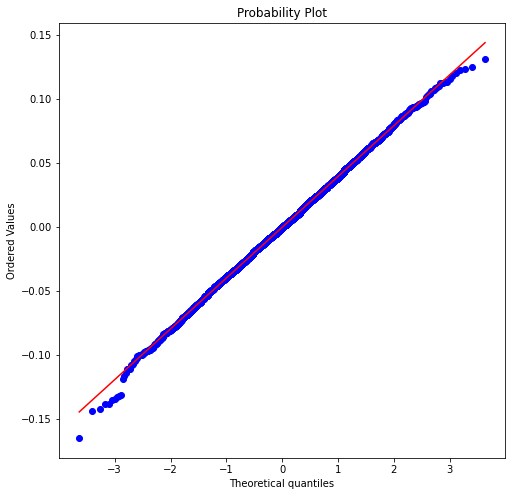

In [6]:
# Test the normality of a given simulation
mcs.normality(mcs.monte_carlo_trials(10000,3,5000))

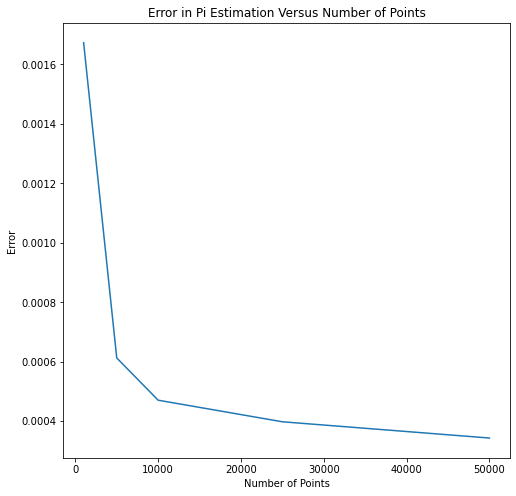

In [13]:
mcs.pi_error_plot()

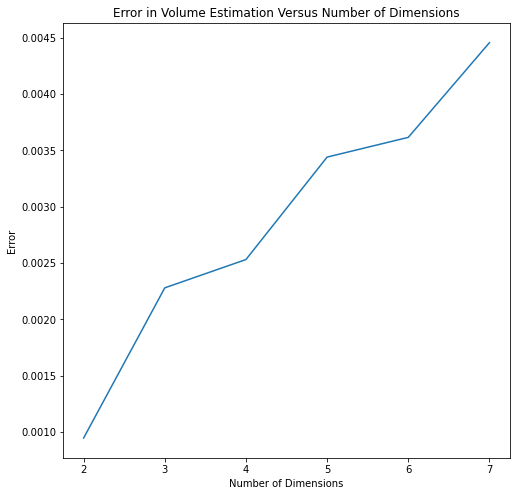

In [32]:
mcs.plot_error_vs_dim()

## Simple Linear Regression Using Monte Carlo Data

Using sklearn we can look at a simple linear regressiod to provide a predictive model for finding the error of the a Monte Carlo simulation for a specific number of points. We have error as our dependent variable and the number of random points generated as the independent variable. 

In [67]:
# Generate data
data=[]
for i in range(1000,150000,500):
    data.append((i, mcs.monte_carlo_pi(i)))

df = pd.DataFrame(data)
df.describe()[1]

count    298.000000
mean       0.000263
std        0.008350
min       -0.030407
25%       -0.003937
50%        0.000390
75%        0.004819
max        0.045593
Name: 1, dtype: float64

In [68]:
# Select values from data frame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [159]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [160]:
# Create a linear regression instance
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [161]:
# Generate predicted values
y_pred = regressor.predict(X_test)

### Training the Model

Text(0, 0.5, 'Error')

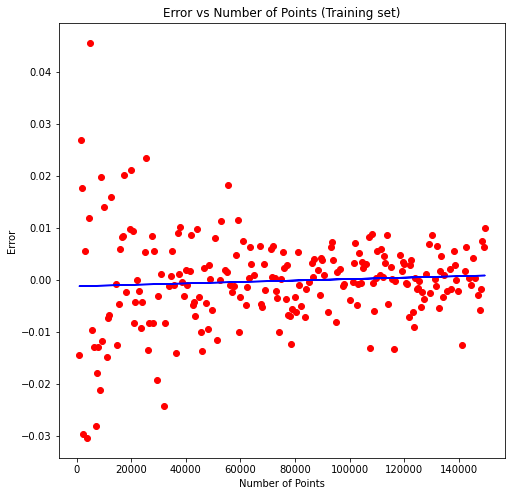

In [162]:
# Scatter plot training data, establish linear regression
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Error vs Number of Points (Training set)')
plt.xlabel('Number of Points')
plt.ylabel('Error')

### Testing the Model

Text(0, 0.5, 'Error')

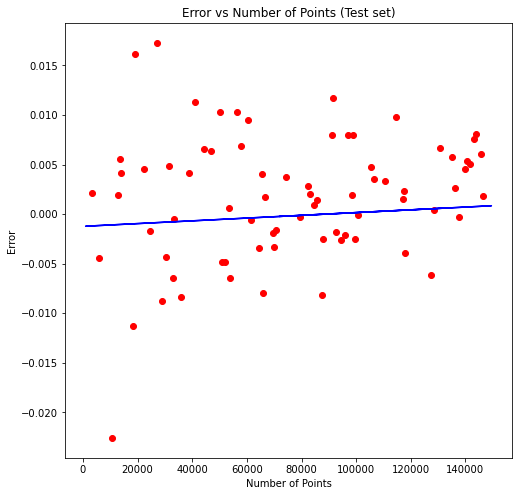

In [163]:
# Scatter plot with best fit line of training data
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Error vs Number of Points (Test set)')
plt.xlabel('Number of Points')
plt.ylabel('Error')

### Analysis

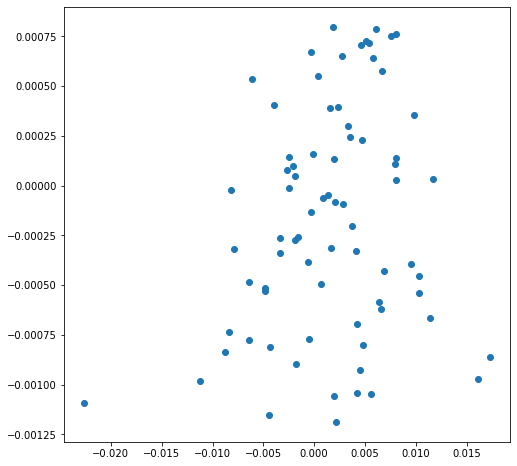

In [164]:
plt.scatter(y_test, y_pred)

In [165]:
import seaborn as sns

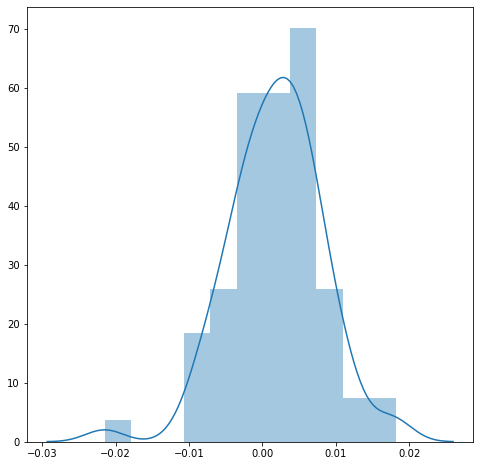

In [166]:
sns.distplot(y_test-y_pred)

In [167]:
from sklearn import metrics

In [168]:
# Mean absolute error
metrics.mean_absolute_error(y_test,y_pred)

0.00513677809823294

In [169]:
# Mean squared error
metrics.mean_squared_error(y_test,y_pred)

4.339772895019602e-05

In [170]:
# Root mean squared error
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.006587695268468027